In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from matplotlib import gridspec
from glob import glob

import assaytools
from assaytools import platereader

In [2]:
filenames = sorted(glob('infinite_results/*.xml'))
filenames.sort(key=os.path.getmtime)

reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(filenames[read])
    reads.append(read)
    
label = 'ex280_scan_top_gain100'

In [3]:
concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.75e-08,
         3.83e-08,   8.37e-08,   1.83e-07,
         4e-07,   8.75e-07,   1.91e-06,
         4.18e-06,   9.15e-06,   2e-05])


### Plot data at 480 nm

In [14]:
## Name wells and assign corresponding measurements at 480 nm based on ligand placement in plate layout

Bos_prot = np.zeros(12)
Bos_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'C%s' % index

    Bos_prot[well] = reads[0]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'D%s' % index
    Bos_buff[well] = reads[0]['ex280_scan_top_gain100'][buff_well_name]['480']
    
Bos_iso_prot = np.zeros(12)
Bos_iso_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'E%s' % index

    Bos_iso_prot[well] = reads[1]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'F%s' % index
    Bos_iso_buff[well] = reads[1]['ex280_scan_top_gain100'][buff_well_name]['480']
    
Erl_prot = np.zeros(12)
Erl_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'G%s' % index
    Erl_prot[well] = reads[2]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'H%s' % index
    Erl_buff[well] = reads[2]['ex280_scan_top_gain100'][buff_well_name]['480']

[11814. 11523.  5176.  3151.  2951.  3013.  3106.  3159.  3264.  3582.
  3418.  3585.]


# Logx plot

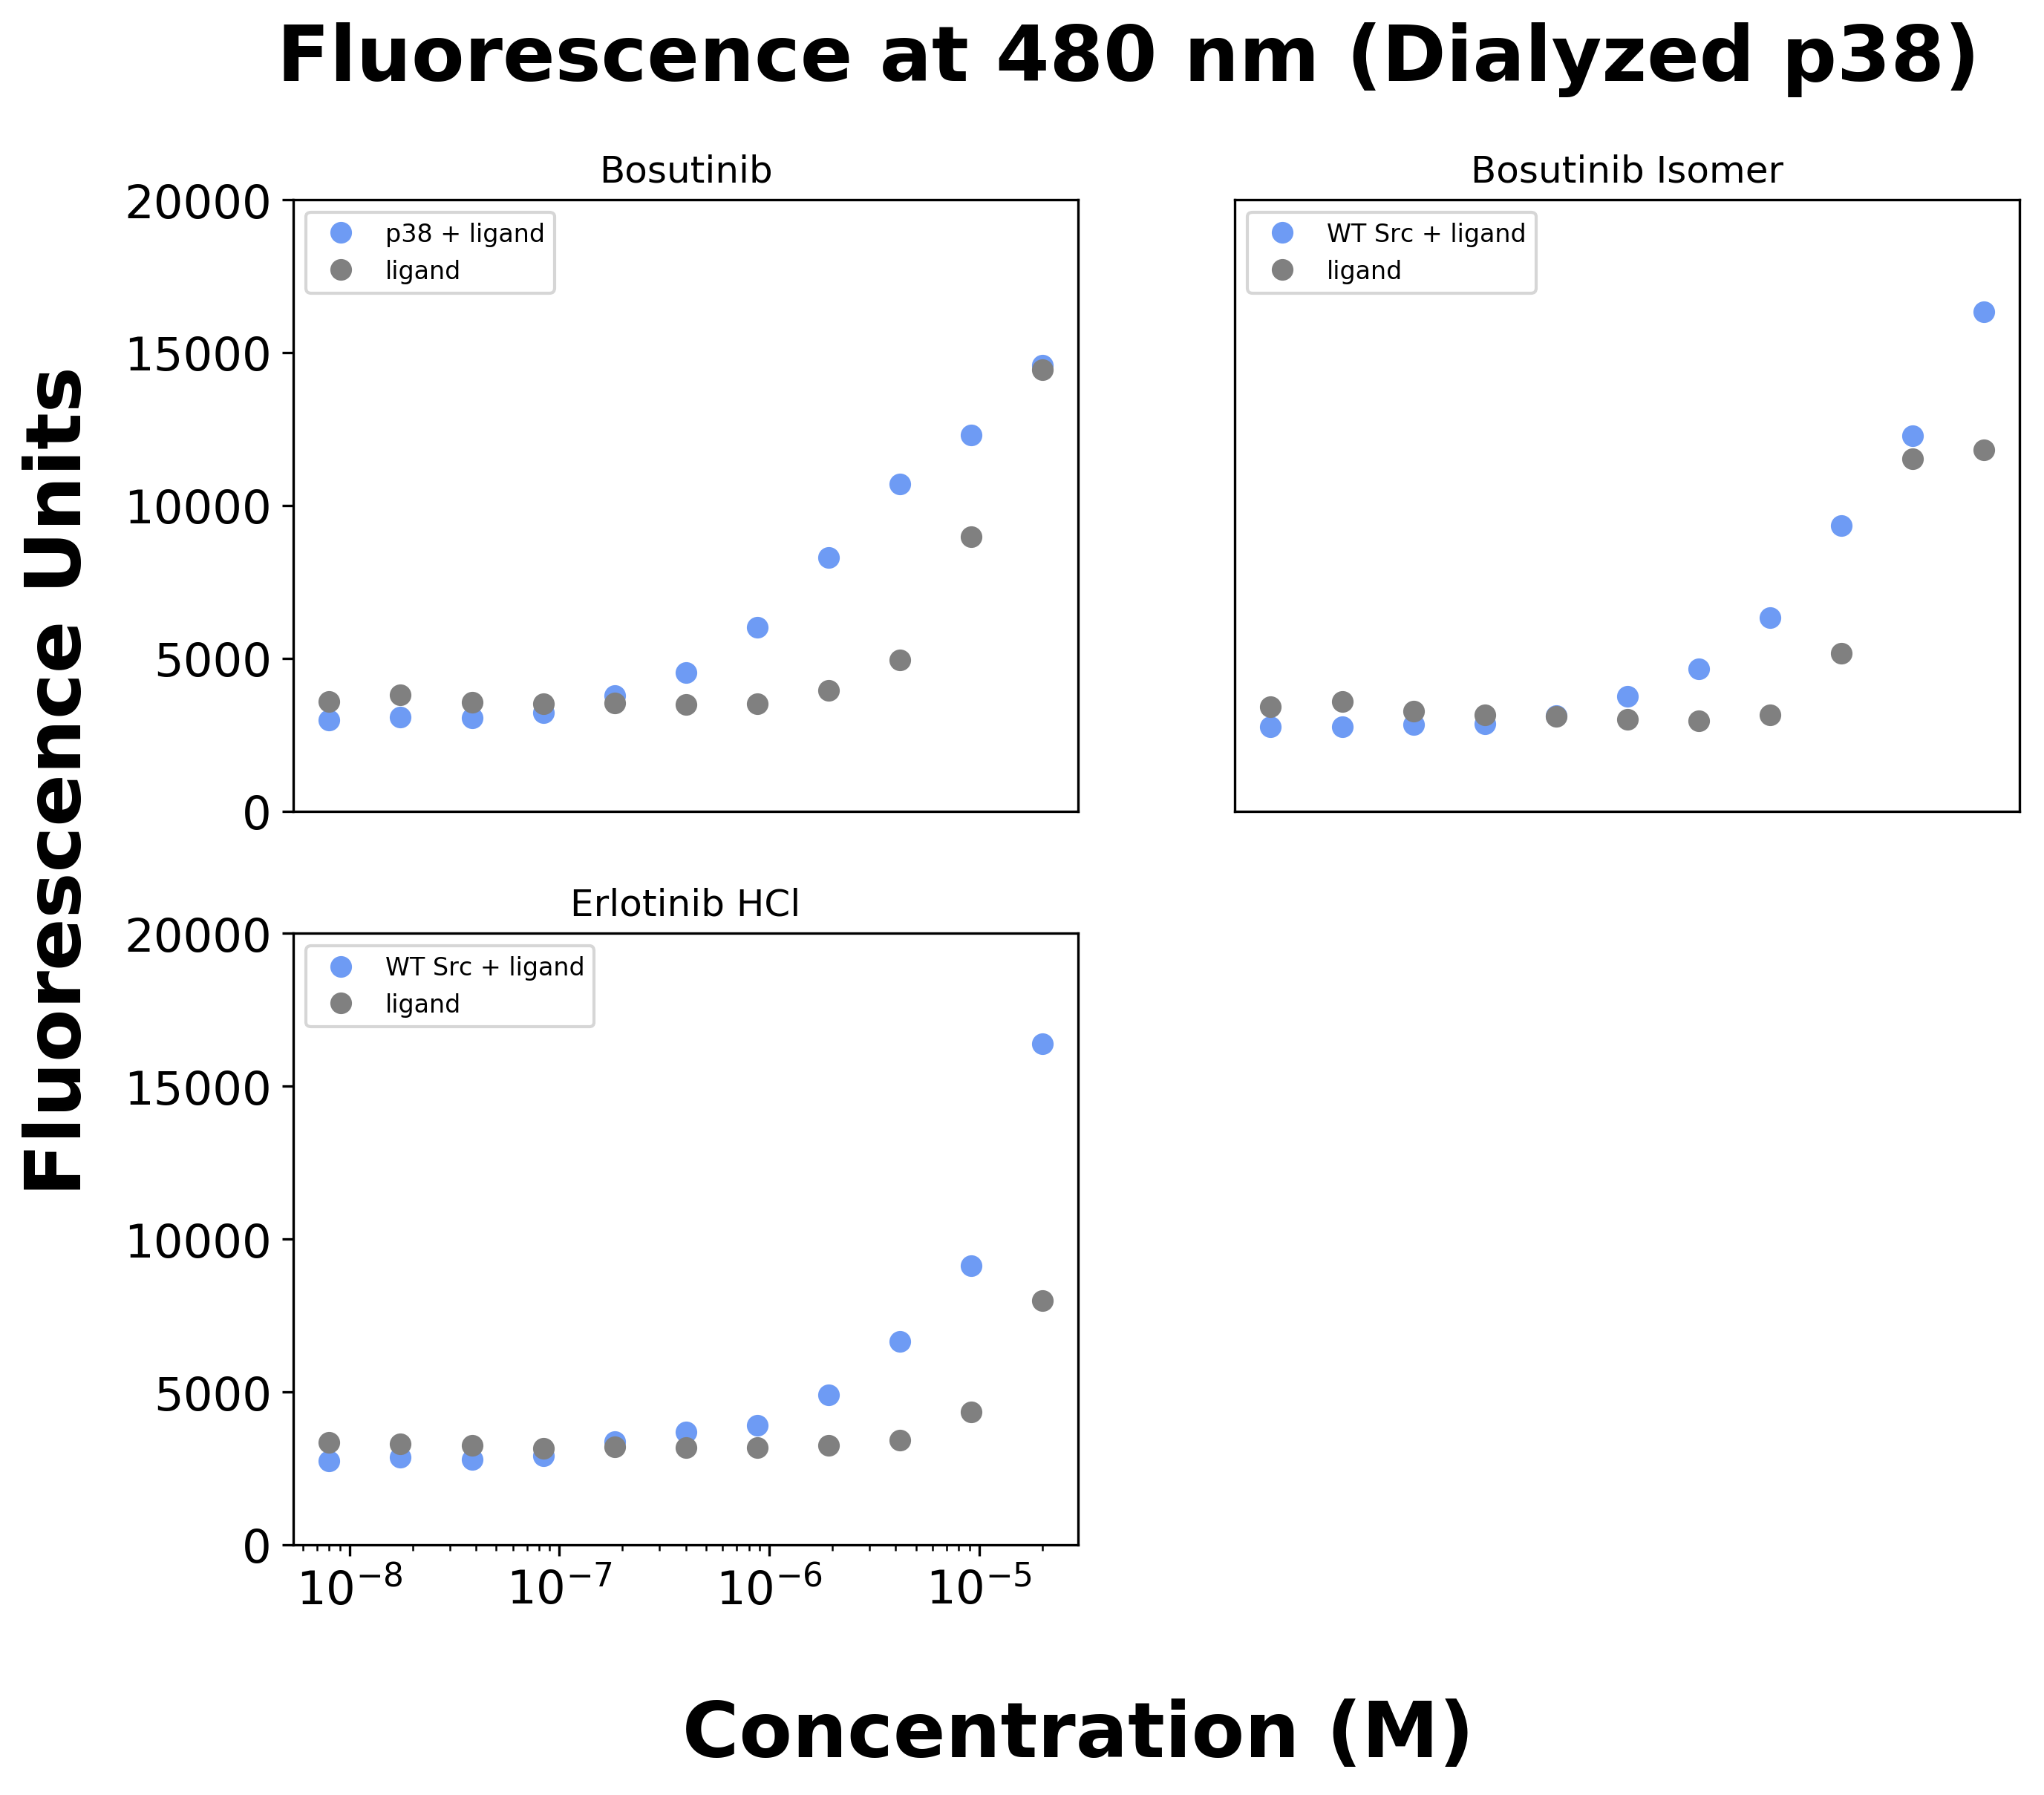

In [21]:
## make 4 plots, one for each ligand at 480 nm Em
current_palette = sns.color_palette("husl", 10)

wavelength = '480'
protein_color = current_palette[7]
buffer_color = 'gray'

fig = plt.figure(figsize=(10,8), dpi=300)
plt.suptitle('Fluorescence at 480 nm (Dialyzed p38)', fontsize=25, fontweight='bold')
ax1 = fig.add_subplot(2,2,1)

# Plot fluorescence
plt.semilogx(concentrations, np.flip(Bos_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, np.flip(Bos_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 20000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['p38 + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Bosutinib')

ax1 = fig.add_subplot(2,2,2)


# Plot fluorescence
plt.semilogx(concentrations, np.flip(Bos_iso_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, np.flip(Bos_iso_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 20000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['WT Src + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)

# Plot fluorescence
plt.semilogx(concentrations, np.flip(Erl_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.semilogx(concentrations, np.flip(Erl_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 20000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_tick_params(labelsize=15)
plt.legend(['WT Src + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Erlotinib HCl')
axis = plt.gca()
plt.ylabel('Fluorescence Units', fontsize=25, fontweight='bold')
axis.yaxis.set_label_coords(-0.25,1.25)
plt.xlabel('Concentration (M)', fontsize=25, fontweight='bold')
axis.xaxis.set_label_coords(1,-0.25)

fig.savefig('20190613_p38_4ti-0223_logx.pdf', dpi=300)

# Log Log plot


/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


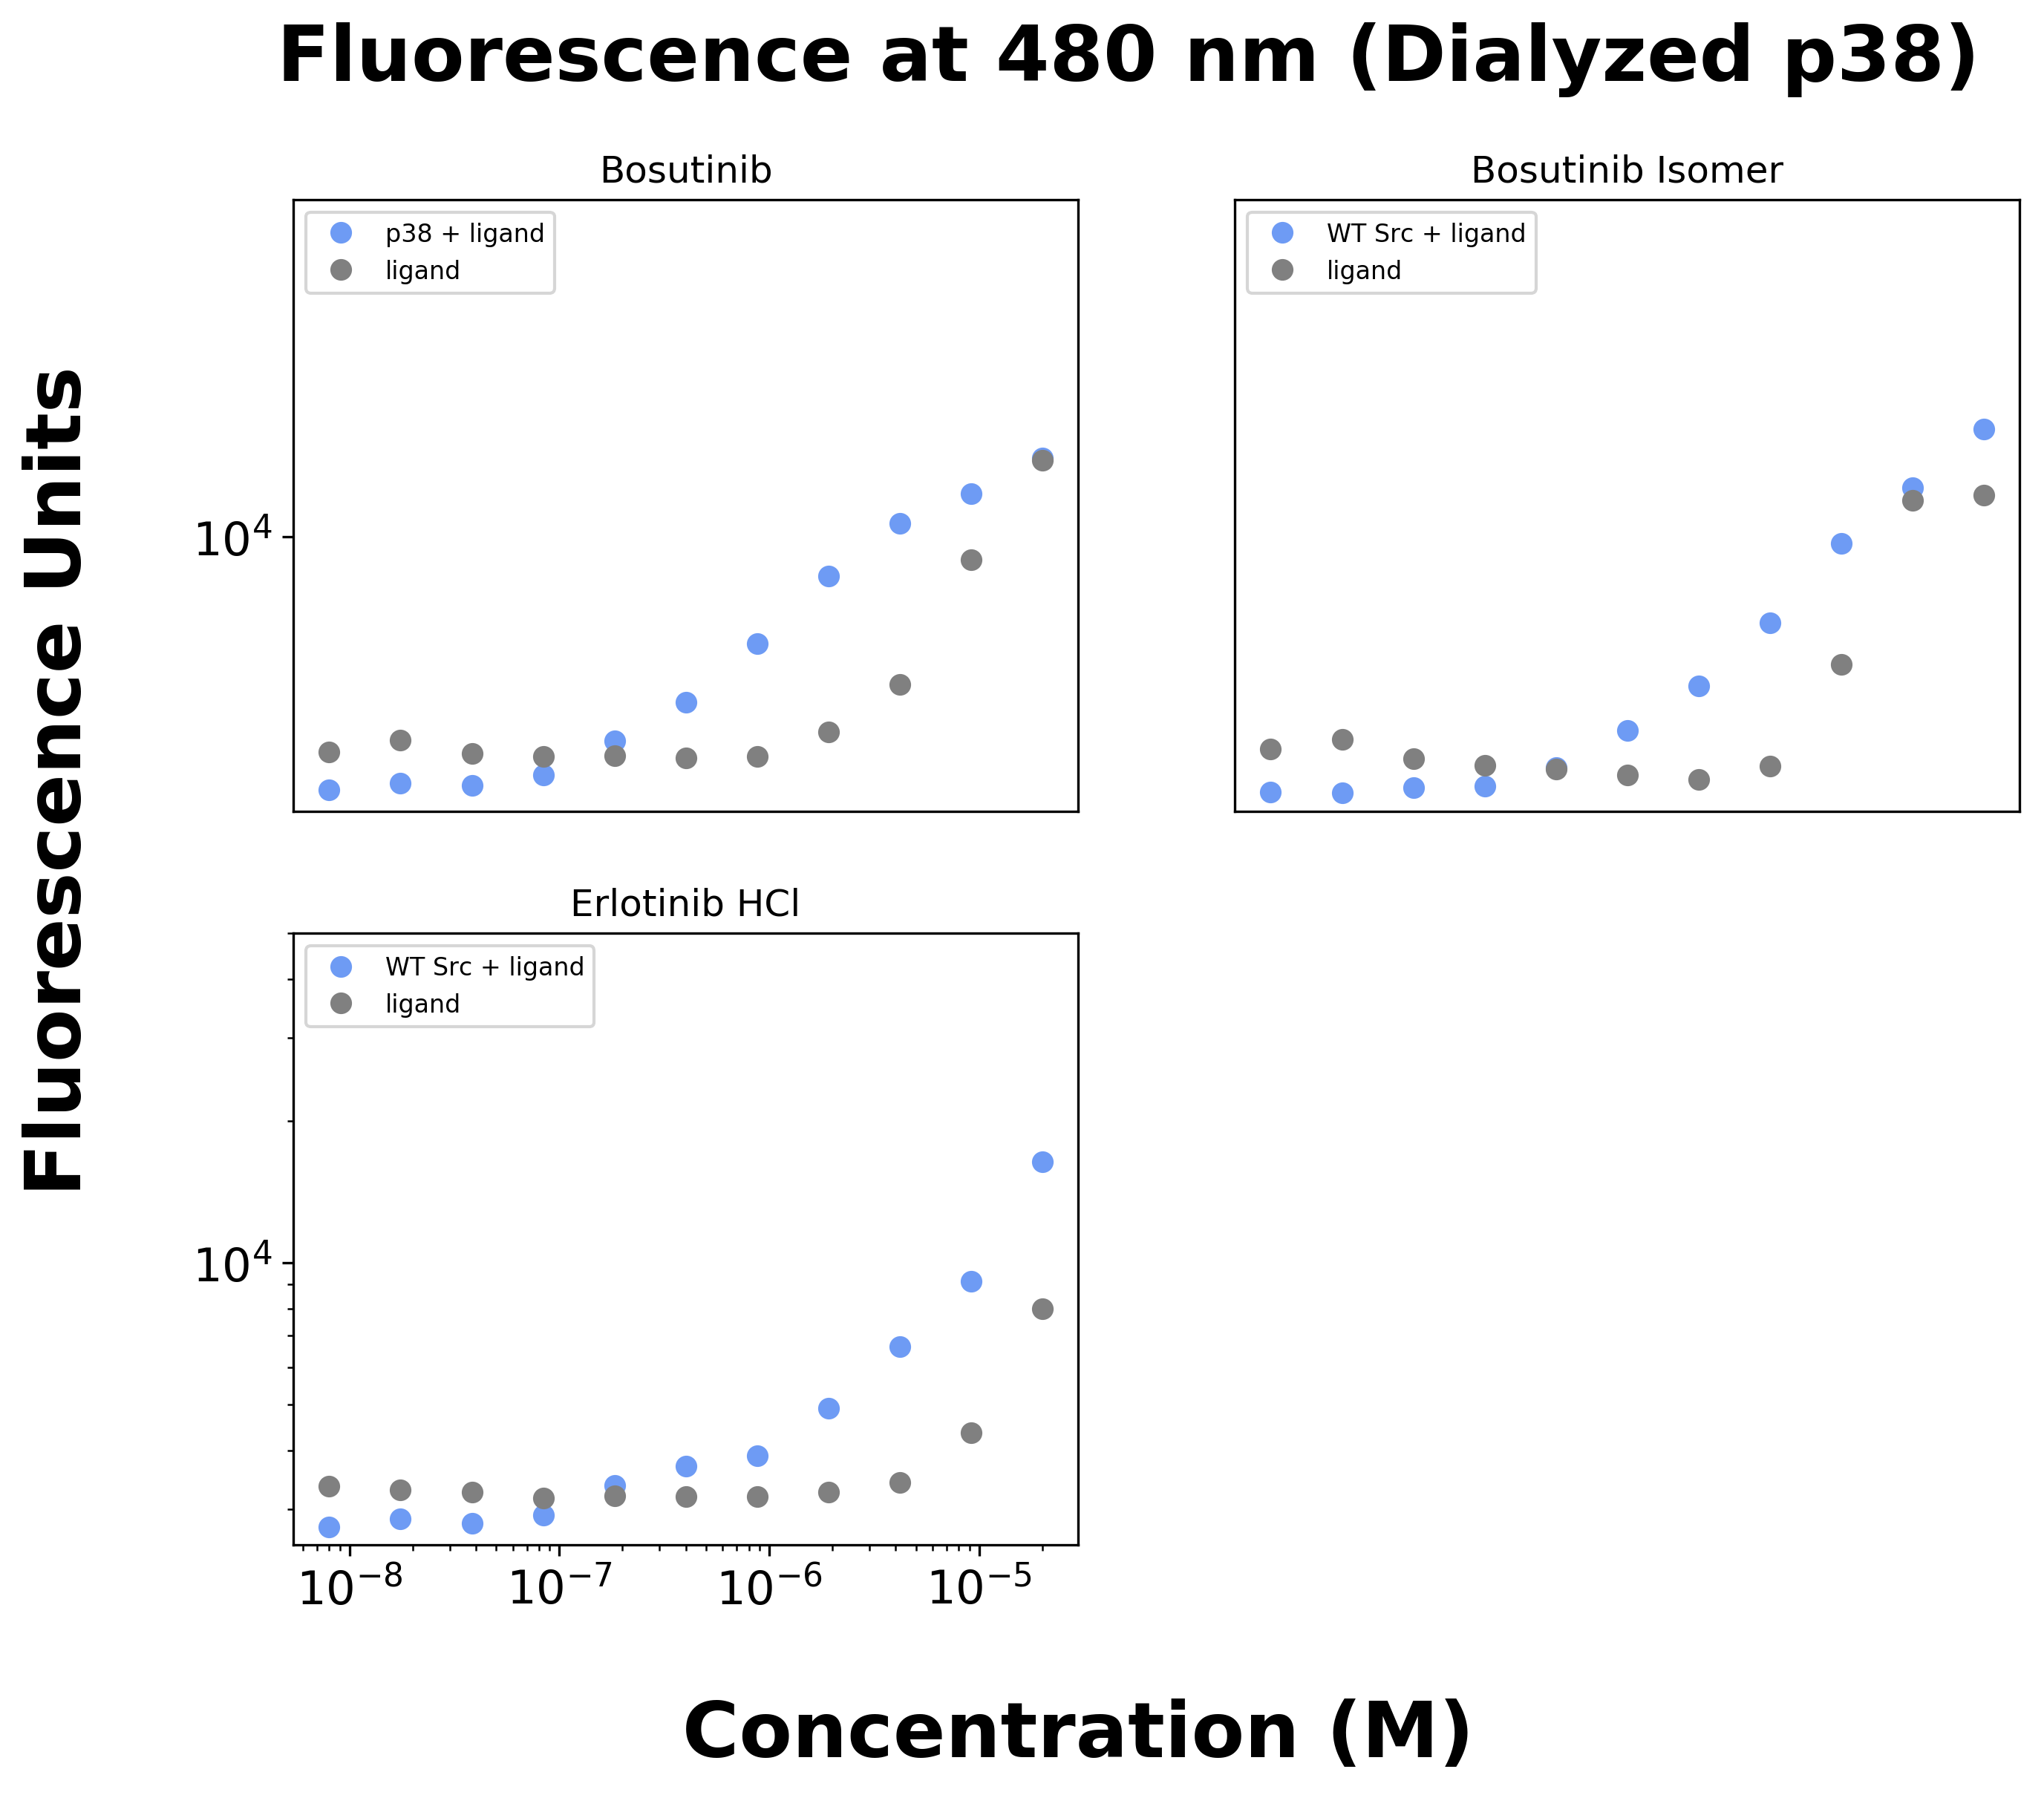

In [20]:
current_palette = sns.color_palette("husl", 10)

wavelength = '480'
protein_color = current_palette[7]
buffer_color = 'gray'

fig = plt.figure(figsize=(10,8), dpi=300)
plt.suptitle('Fluorescence at 480 nm (Dialyzed p38)', fontsize=25, fontweight='bold')
ax1 = fig.add_subplot(2,2,1)

# Plot fluorescence
plt.loglog(concentrations, np.flip(Bos_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, np.flip(Bos_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 50000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['p38 + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Bosutinib')

ax1 = fig.add_subplot(2,2,2)


# Plot fluorescence
plt.loglog(concentrations, np.flip(Bos_iso_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, np.flip(Bos_iso_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 50000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
plt.minorticks_off()
plt.legend(['WT Src + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Bosutinib Isomer')

ax1 = fig.add_subplot(2,2,3)

# Plot fluorescence
plt.loglog(concentrations, np.flip(Erl_prot, axis=0), c=protein_color, marker='.', linestyle='None', markersize=12)
plt.loglog(concentrations, np.flip(Erl_buff, axis=0), c=buffer_color, marker='.', linestyle='None', markersize=12)
ax1.set_ylim(0, 50000)

ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_tick_params(labelsize=15)
plt.legend(['WT Src + ligand', 'ligand'], loc=2, prop={'size': 8})
plt.title('Erlotinib HCl')
axis = plt.gca()
plt.ylabel('Fluorescence Units', fontsize=25, fontweight='bold')
axis.yaxis.set_label_coords(-0.25,1.25)
plt.xlabel('Concentration (M)', fontsize=25, fontweight='bold')
axis.xaxis.set_label_coords(1,-0.25)

fig.savefig('20190613_p38_4ti-0223_logx.pdf', dpi=300)



fig.savefig('20190613_p38_4ti-0223_loglog.pdf', dpi=300)